# E-COMMERCE SALES ANALYSIS

## IMPORTING LIBRARIES

In [198]:
# Importing Libraries for Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Importing Libraries for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Importing Libraries for Additional Tools
import missingno as msno
from wordcloud import WordCloud

# Importing Warnings for Managing Runtime Warnings
import warnings


In [199]:
pip install matplotlib wordcloud

In [200]:
pip install plotly

In [201]:
pd.set_option('display.max_columns', None)

## READING THE DATASET

In [202]:
#Reading the Dataset
amazon_sales = pd.read_csv("/content/drive/MyDrive/E-commerce data/DATA/Amazon Sale Report.csv")

<ipython-input-202-1ffc1ad2b255>:2: DtypeWarning:

Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.



In [203]:
amazon_sales.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [204]:
amazon_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

## DATA PRE_PROCESSING

In [205]:
# Copying the 'amazon_sales' DataFrame to 'sales' for further analysis or manipulation
sales = amazon_sales.copy()

### Renaming to naming convention

In [206]:
# The columes name does not follow the standard naming convection
sales.columns


Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [207]:
# Renaming the columns as per the naming convention of the columns
sales.rename(columns={
    "Order ID": "order_ID",
    "Date": "date",
    "Status": "status",
    "Fulfilment":"fulfilment",
    "Sales Channel ": "sales_channel",
    "ship-service-level": "ship_service_level",
    "Style": "style",
    "Category": "category",
    "Size": "size",
    "Courier Status": "courier_status",
    "Qty": "quantity",
    "Amount": "amount",
    "ship-city": "ship_city",
    "ship-state": "ship_state",
    "ship-postal-code": "ship_postal_code",
    "ship-country": "ship_country",
    "promotion-ids": "promotion_ids",
    "fulfilled-by": "fulfilled_by"
    }, inplace=True
)

sales.head()

,index,order_ID,date,status,fulfilment,sales_channel,ship_service_level,style,SKU,category,size,ASIN,courier_status,quantity,currency,amount,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,B2B,fulfilled_by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


### Checking for Null values

<Axes: >

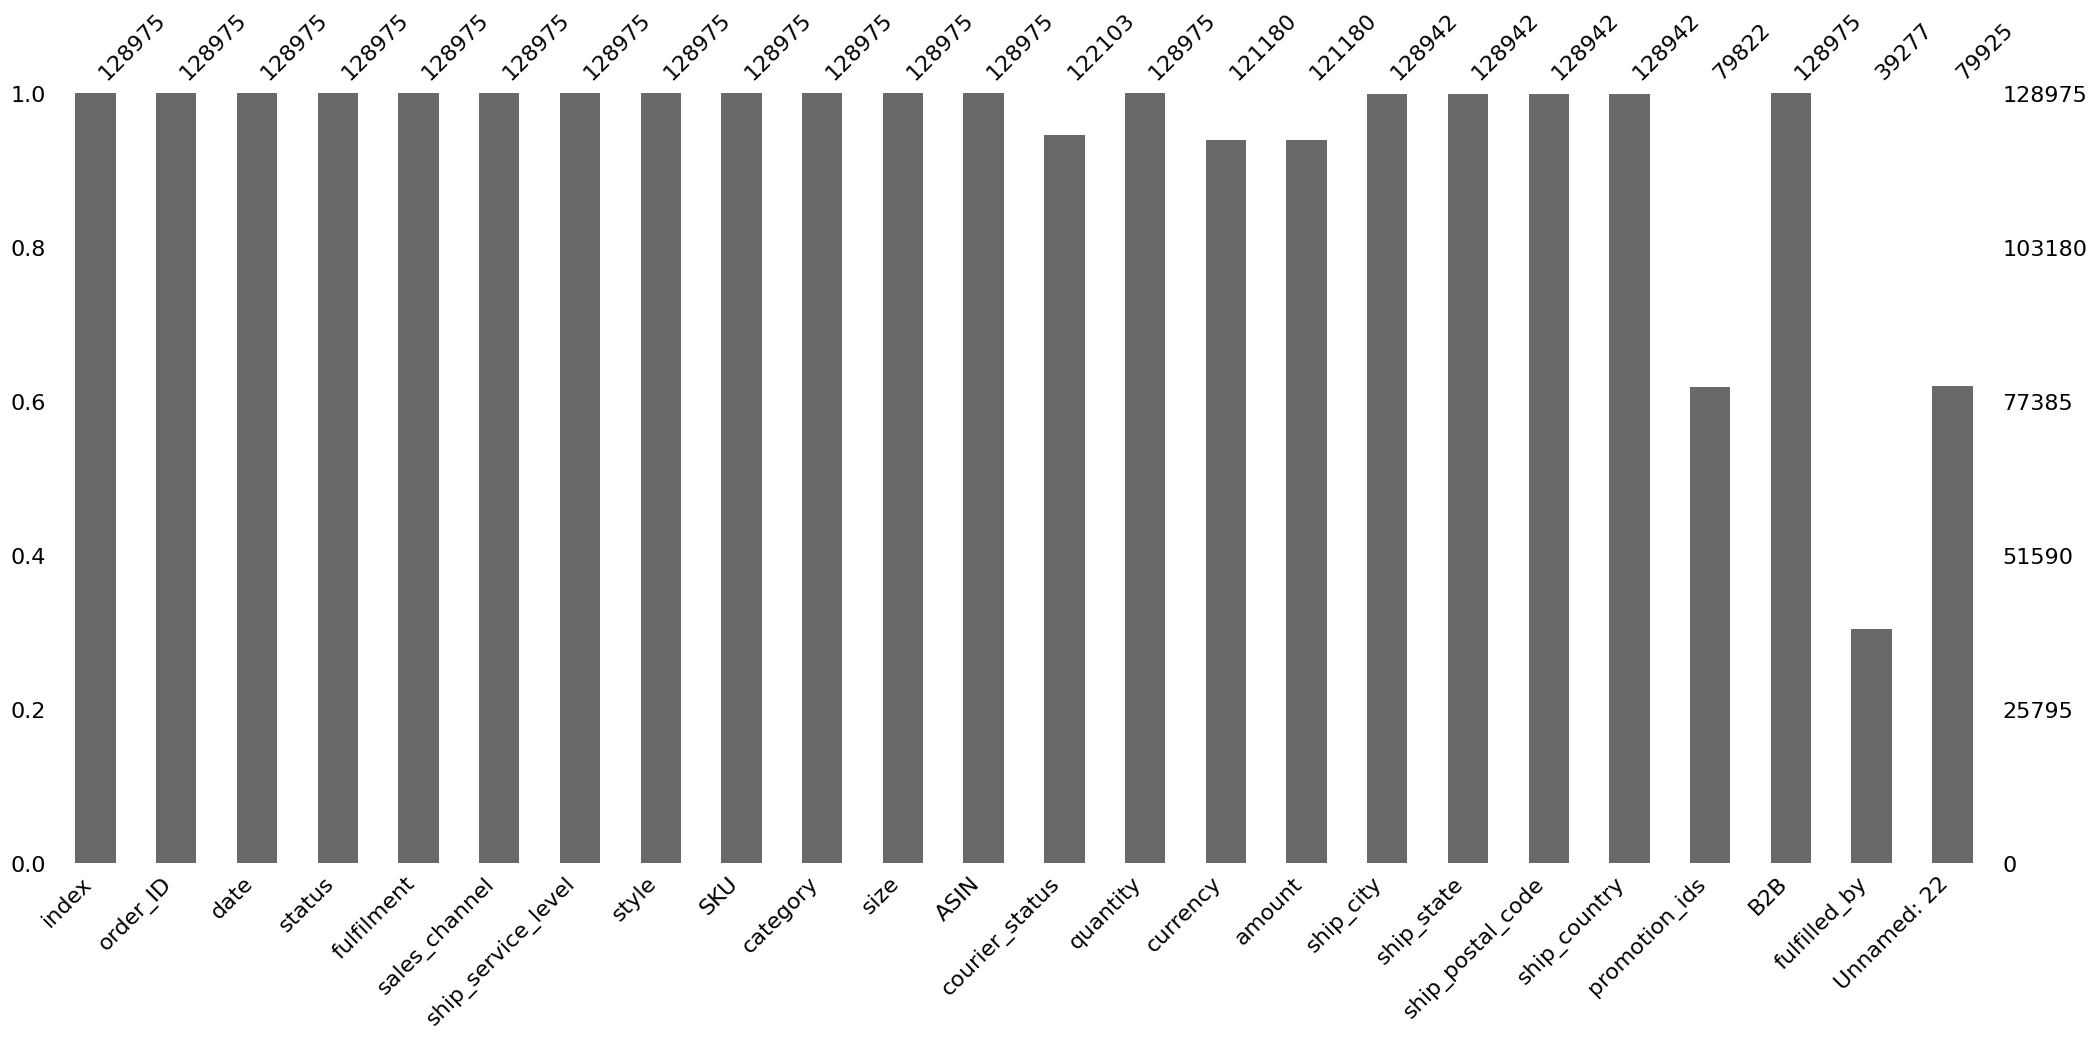

In [208]:
msno.bar(sales)

In [209]:
# Listing out the columns which contains only null values
[attributes for attributes in sales.columns
if sales[attributes].isnull().sum()>0]

['courier_status',
 'currency',
 'amount',
 'ship_city',
 'ship_state',
 'ship_postal_code',
 'ship_country',
 'promotion_ids',
 'fulfilled_by',
 'Unnamed: 22']

### Handling null values

#### Currency

In [210]:
#As this dataset contains the prices in INR Therefore Imputing the null value with INR
sales["currency"] = sales.currency.fillna(value='INR')

#### courier_status

In [256]:
# It was discovered that the courier status field for the status of the cancelled order included null values.
sales[sales["courier_status"].isna()][["status","courier_status"]].head(5)

,status,courier_status


In [212]:
#Imputing the null value in the courier_status column
sales["courier_status"] = sales.courier_status.fillna(value='Cancelled')

#### ship_city, ship_state, ship_postal_code

In [257]:
#It was discovered that ship_city had a null value, which meant that the row's matching columns, ship_state and ship_postal, also had null values.
sales[sales["ship_city"].isna()][["ship_city","ship_state","ship_postal_code"]].head(5)

,ship_city,ship_state,ship_postal_code


In [214]:
#Dropping the null values
sales.dropna(subset=['ship_city'], inplace=True)

In [215]:
sales.isna().sum()

index                     0
order_ID                  0
date                      0
status                    0
fulfilment                0
sales_channel             0
ship_service_level        0
style                     0
SKU                       0
category                  0
size                      0
ASIN                      0
courier_status            0
quantity                  0
currency                  0
amount                 7793
ship_city                 0
ship_state                0
ship_postal_code          0
ship_country              0
promotion_ids         49145
B2B                       0
fulfilled_by          89678
Unnamed: 22           49037
dtype: int64

#### promotion_ids

In [216]:
sales["promotion_ids"].head()

0                                                  NaN
1    Amazon PLCC Free-Financing Universal Merchant ...
2         IN Core Free Shipping 2015/04/08 23-48-5-108
3                                                  NaN
4                                                  NaN
Name: promotion_ids, dtype: object

In [217]:
#Some products may have promotion codes according to the brand; these were coded as 1, and those without promotion codes were coded as 0.
sales['promotion_ids'] = sales['promotion_ids'].notna().astype(int)

In [218]:
sales.head(5)

,index,order_ID,date,status,fulfilment,sales_channel,ship_service_level,style,SKU,category,size,ASIN,courier_status,quantity,currency,amount,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,B2B,fulfilled_by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Cancelled,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,0,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,1,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,1,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Cancelled,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,0,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,0,False,NaN,NaN


#### amount

In [258]:
#Extracting rows where the 'amount' column is NaN and displaying relevant columns ('amount' and 'status')
sales[sales["amount"].isna()][["amount","status"]].head(5)

,amount,status


In [220]:
 # Filling NaN values in the 'amount' column with "0"
sales["amount"].fillna(value = "0",inplace=True)

### Dropping unnecessary columns

In [221]:
#Since there is only one value in this column, it makes no sense to replace all null values with easy ship in order to gain understanding.
sales["fulfilled_by"].unique()

array(['Easy Ship', nan], dtype=object)

In [222]:
# Hence Dropping  fulfilled_by column
sales.drop(columns=["fulfilled_by"], inplace=True)

In [223]:
#Removing the unnecessary columns
sales= sales.drop(['Unnamed: 22','B2B'],axis=1)

### Duplicate value

In [224]:
#Checking for duplicate values.
sales[sales.duplicated()]

,index,order_ID,date,status,fulfilment,sales_channel,ship_service_level,style,SKU,category,size,ASIN,courier_status,quantity,currency,amount,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids


### Converting to uppercase

In [225]:
# Converting the 'ship_state' column to uppercase for uniformity
sales["ship_state"] = sales["ship_state"].str.upper()
sales["ship_state"].value_counts()

MAHARASHTRA               22260
KARNATAKA                 17326
TAMIL NADU                11483
TELANGANA                 11330
UTTAR PRADESH             10638
DELHI                      6967
KERALA                     6585
WEST BENGAL                5963
ANDHRA PRADESH             5430
GUJARAT                    4489
HARYANA                    4415
RAJASTHAN                  2711
MADHYA PRADESH             2529
ODISHA                     2136
BIHAR                      2114
PUNJAB                     1917
ASSAM                      1663
UTTARAKHAND                1553
JHARKHAND                  1456
GOA                        1137
CHHATTISGARH                909
HIMACHAL PRADESH            788
JAMMU & KASHMIR             702
PUDUCHERRY                  350
CHANDIGARH                  333
MANIPUR                     316
ANDAMAN & NICOBAR           257
MEGHALAYA                   207
SIKKIM                      205
NAGALAND                    185
TRIPURA                     151
ARUNACHA

In [226]:
# Converting the 'ship_city' column to uppercase for uniformity
sales["ship_city"]= sales["ship_city"].str.upper()
sales["ship_city"].value_counts()

BENGALURU                                             11898
HYDERABAD                                              9125
MUMBAI                                                 7122
NEW DELHI                                              6340
CHENNAI                                                6284
PUNE                                                   4617
KOLKATA                                                2844
GURUGRAM                                               1954
THANE                                                  1877
NOIDA                                                  1627
LUCKNOW                                                1627
GHAZIABAD                                              1485
AHMEDABAD                                              1444
NAVI MUMBAI                                            1403
BANGALORE                                              1362
JAIPUR                                                 1062
COIMBATORE                              

### Renaming values

#### ship_state

In [227]:
sales["ship_state"].unique().tolist()

['MAHARASHTRA',
 'KARNATAKA',
 'PUDUCHERRY',
 'TAMIL NADU',
 'UTTAR PRADESH',
 'CHANDIGARH',
 'TELANGANA',
 'ANDHRA PRADESH',
 'RAJASTHAN',
 'DELHI',
 'HARYANA',
 'ASSAM',
 'JHARKHAND',
 'CHHATTISGARH',
 'ODISHA',
 'KERALA',
 'MADHYA PRADESH',
 'WEST BENGAL',
 'NAGALAND',
 'GUJARAT',
 'UTTARAKHAND',
 'BIHAR',
 'JAMMU & KASHMIR',
 'PUNJAB',
 'HIMACHAL PRADESH',
 'ARUNACHAL PRADESH',
 'MANIPUR',
 'GOA',
 'MEGHALAYA',
 'TRIPURA',
 'LADAKH',
 'DADRA AND NAGAR',
 'SIKKIM',
 'ANDAMAN & NICOBAR ',
 'RAJSHTHAN',
 'NL',
 'MIZORAM',
 'NEW DELHI',
 'PUNJAB/MOHALI/ZIRAKPUR',
 'RJ',
 'ORISSA',
 'LAKSHADWEEP',
 'PB',
 'APO',
 'AR',
 'PONDICHERRY',
 'RAJSTHAN']

In [228]:
#RENAMING TO PROPER STATE NAMES

replace_dict = {
    'PUDUCHERRY': 'PONDICHERRY',
    'RAJSHTHAN': 'RAJASTHAN',
    'RAJSTHAN': 'RAJASTHAN',
    'NEW DELHI': 'DELHI',
    'RJ':'RAJASTHAN',
    'PB':'PUNJAB',
    'AR':'ARUNACHAL PRADESH',
    'NL':'NAGALAND',
}

sales['ship_state'] = sales['ship_state'].replace(replace_dict)

In [229]:
sales["ship_state"].unique().tolist()


['MAHARASHTRA',
 'KARNATAKA',
 'PONDICHERRY',
 'TAMIL NADU',
 'UTTAR PRADESH',
 'CHANDIGARH',
 'TELANGANA',
 'ANDHRA PRADESH',
 'RAJASTHAN',
 'DELHI',
 'HARYANA',
 'ASSAM',
 'JHARKHAND',
 'CHHATTISGARH',
 'ODISHA',
 'KERALA',
 'MADHYA PRADESH',
 'WEST BENGAL',
 'NAGALAND',
 'GUJARAT',
 'UTTARAKHAND',
 'BIHAR',
 'JAMMU & KASHMIR',
 'PUNJAB',
 'HIMACHAL PRADESH',
 'ARUNACHAL PRADESH',
 'MANIPUR',
 'GOA',
 'MEGHALAYA',
 'TRIPURA',
 'LADAKH',
 'DADRA AND NAGAR',
 'SIKKIM',
 'ANDAMAN & NICOBAR ',
 'MIZORAM',
 'PUNJAB/MOHALI/ZIRAKPUR',
 'ORISSA',
 'LAKSHADWEEP',
 'APO']

#### status

In [230]:
sales["status"].unique().tolist()

['Cancelled',
 'Shipped - Delivered to Buyer',
 'Shipped',
 'Shipped - Returned to Seller',
 'Shipped - Rejected by Buyer',
 'Shipped - Lost in Transit',
 'Shipped - Out for Delivery',
 'Shipped - Returning to Seller',
 'Shipped - Picked Up',
 'Pending',
 'Pending - Waiting for Pick Up',
 'Shipped - Damaged',
 'Shipping']

In [231]:
# Renaming to desired status name
replace_dict1 = {
    "Shipped - Delivered to Buyer": "Shipped",
    "Shipped - Returned to Seller": "Returned",
    "Shipped - Picked Up": "Shipped",
    "Shipped - Returning to Seller": "Returning",
    "Shipped - Out for Delivery": "Out for Delivery",
    "Shipped - Rejected by Buyer": "Rejected",
    "Shipped - Damaged": "Damaged",
    "Shipping": "Shipped",
    "Shipped - Lost in Transit" : "Lost",
    "Pending - Waiting for Pick Up": "Pending Pick Up"
}

sales['status'] = sales['status'].replace(replace_dict1)

In [232]:
sales.status.unique().tolist()

['Cancelled',
 'Shipped',
 'Returned',
 'Rejected',
 'Lost',
 'Out for Delivery',
 'Returning',
 'Pending',
 'Pending Pick Up',
 'Damaged']

### Converting the datatype

In [233]:
# Converting the datatype
sales['ship_postal_code'] = sales['ship_postal_code'].astype(int)
sales['amount'] = sales['amount'].astype(int)

In [234]:
sales.dtypes

index                  int64
order_ID              object
date                  object
status                object
fulfilment            object
sales_channel         object
ship_service_level    object
style                 object
SKU                   object
category              object
size                  object
ASIN                  object
courier_status        object
quantity               int64
currency              object
amount                 int64
ship_city             object
ship_state            object
ship_postal_code       int64
ship_country          object
promotion_ids          int64
dtype: object

## EDA

### SALES ANALYSIS

#### RQ1: What has been the sales trend during the available time period?

In [235]:
#Determining the start and end dates of the sales data
start_date = sales['date'].min()
end_date = sales['date'].max()
start_date, end_date

('03-31-22', '06-29-22')

In [236]:
# Extracting only the date
sales['date'] = pd.to_datetime(sales['date']).dt.date

# Group by 'date' and sum the amount based on date
total_sales = sales.groupby('date')['amount'].sum().reset_index()


total_sales = sales.groupby('date')['amount'].agg(['sum', 'count']).reset_index()
total_sales['average_sales'] = total_sales['sum'] / total_sales['count']
total_sales


,date,sum,count,average_sales
0,2022-03-31,101680,171,594.619883
1,2022-04-01,865448,1470,588.740136
2,2022-04-02,913076,1555,587.187138
3,2022-04-03,1011739,1691,598.308102
4,2022-04-04,882033,1465,602.070307
5,2022-04-05,950526,1617,587.833024
6,2022-04-06,886958,1557,569.658317
7,2022-04-07,909863,1535,592.744625
8,2022-04-08,1017826,1676,607.294749
9,2022-04-09,972038,1619,600.394070


In [237]:
# Visualising the sales trend

# Creates an empty figure
sales_trend = go.Figure()

# Add a scatter plot for the data points
sales_trend.add_trace(go.Scatter(x=total_sales['date'], y=total_sales['sum'], mode='lines+markers', name='Sales'))
sales_trend.update_traces(marker_color='#ff7f0e')

# Add a linear regression line
z = np.polyfit(total_sales.index, total_sales['sum'], 1)
p = np.poly1d(z)
sales_trend.add_trace(go.Scatter(x=total_sales['date'], y=p(total_sales.index), mode='lines', name='Trend'))


# Customize the layout
sales_trend.update_layout(
    title='Total Sales Trend of the available time frame',
    xaxis_title='Date',
    yaxis_title='Total Sales Amount',
    title_x=0.5,
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    hovermode='x',
    plot_bgcolor='white',
    font=dict(size=14, family='Arial', color='black'),

)

sales_trend.show()


In [238]:
# Visualising the average sales trend for thr available time frame
# Creates an empty figure for average sales trend
average_sales_trend = go.Figure()

# Add a scatter plot for the data points
average_sales_trend.add_trace(go.Scatter(x=total_sales['date'], y=total_sales['average_sales'], mode='lines+markers', name='Average Sales'))
average_sales_trend.update_traces(marker_color='#ff7f0e')


# Add a linear regression line for average sales (optional)
z_avg = np.polyfit(total_sales.index, total_sales['average_sales'], 1)
p_avg = np.poly1d(z_avg)
average_sales_trend.add_trace(go.Scatter(x=total_sales['date'], y=p_avg(total_sales.index), mode='lines', name='Trend'))


# Customize the layout for average sales trend
average_sales_trend.update_layout(
    title='Average Sales Trend',
    xaxis_title='Date',
    yaxis_title='Average Sales Amount',
    title_x=0.5,
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    plot_bgcolor='white',
)


average_sales_trend.show()


#### RQ2: How are order statuses distributed, and what effect does it have on revenue?

In [239]:
sales["status"].unique()

array(['Cancelled', 'Shipped', 'Returned', 'Rejected', 'Lost',
       'Out for Delivery', 'Returning', 'Pending', 'Pending Pick Up',
       'Damaged'], dtype=object)

In [240]:
# Creating a new column 'grouped_status' by mapping and replacing specific values in the 'status' column
grouped_status = sales.replace({'status': {'Cancelled': 'Unsuccessful Orders',
                                          'Rejected': 'Unsuccessful Orders',
                                          'Shipped': 'Successful Orders',
                                          'Out for Delivery': 'Pending Orders',
                                          'Pending Pick Up': 'Pending Orders',
                                          'Returned': 'Unsuccessful Orders',
                                          'Returning': 'Unsuccessful Orders',
                                          'Lost': 'Issues Orders',
                                          'Damaged': 'Issues Orders',
                                          'Pending': 'Pending Orders'}})


In [241]:
#Grouping 'status' column and calculate the sum of 'amount' for each group
revenue = grouped_status.groupby("status")['amount'].sum().reset_index()
revenue

,status,amount
0,Issues Orders,3133
1,Pending Orders,649380
2,Successful Orders,69621310
3,Unsuccessful Orders,8297763


In [242]:
#Creating a bar chart
fig = px.bar(revenue, x='status', y='amount', labels={'status': 'Status of the Order', 'amount': 'Total Revenue'})
fig.update_traces(text=revenue['amount'], texttemplate='%{text:.2s}', textposition='outside')
fig.update_traces(marker_color='#ff7f0e')  # Change bar color to blue


# Customizing the appearance and layout
fig.update_layout(
    title='Distribution of order status and their Impact on Revenue',
    xaxis_title='Order Status',
    yaxis_title='Total Revenue',
    plot_bgcolor='lightgray',
    xaxis=dict(showgrid=False, gridcolor='gray'),
    font=dict(size=14, family='Arial', color='black'),
    title_x=0.5
)

# Adding an outline to the bars
fig.update_traces(marker_line_width=1, marker_line_color='black')

fig.show()

#### RQ3: What patterns emerge when analyzing how sales is distributed across various geographic areas?"

In [243]:
# Extracting Relevant column for analysis
patterns = sales[["ship_city","ship_state","amount"]]

In [244]:
#Grouping by 'ship_state', calculate the sum of 'amount' for each state and extract the top 5 states
top5_states= patterns.groupby("ship_state")["amount"].sum().sort_values(ascending=False).head(5).reset_index()


In [245]:
# Assuming you have the top 5 states based on sales
top_states = patterns.groupby("ship_state")["amount"].sum().sort_values(ascending=False).head(5).reset_index()

# Creating a bar chart with a heatmap color scale
fig = px.bar(top_states, x='ship_state', y='amount', text='amount', color='amount',
             color_continuous_scale='Viridis',  # You can use different color scales here
             labels={'ship_state': 'State', 'amount': 'Total Sales Amount'},
             title='Top 5 States by Sales',
             template='plotly')

# Customizing the layout
fig.update_layout(
    title_x=0.5,
    xaxis_title='State',
    yaxis_title='Total Sales Amount',
    font=dict(size=14),
    xaxis=dict(categoryorder='total ascending', tickangle=-60),
)

# Showing the bar chart
fig.show()



#### RQ4: Which products are in high demand among customers and how much revenue the high demand products are generating

In [246]:
sales["category"].unique()

array(['Set', 'kurta', 'Western Dress', 'Top', 'Ethnic Dress', 'Bottom',
       'Saree', 'Blouse', 'Dupatta'], dtype=object)

In [247]:
# Grouping the 'sales' DataFrame by 'category', and calculate the sum of 'quantity' for each category
product = sales.groupby("category")["quantity"].sum().reset_index()

In [248]:
product

,category,quantity
0,Blouse,863
1,Bottom,398
2,Dupatta,3
3,Ethnic Dress,1053
4,Saree,152
5,Set,45278
6,Top,9901
7,Western Dress,13942
8,kurta,45031


<ipython-input-249-eca689d2c3cc>:8: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




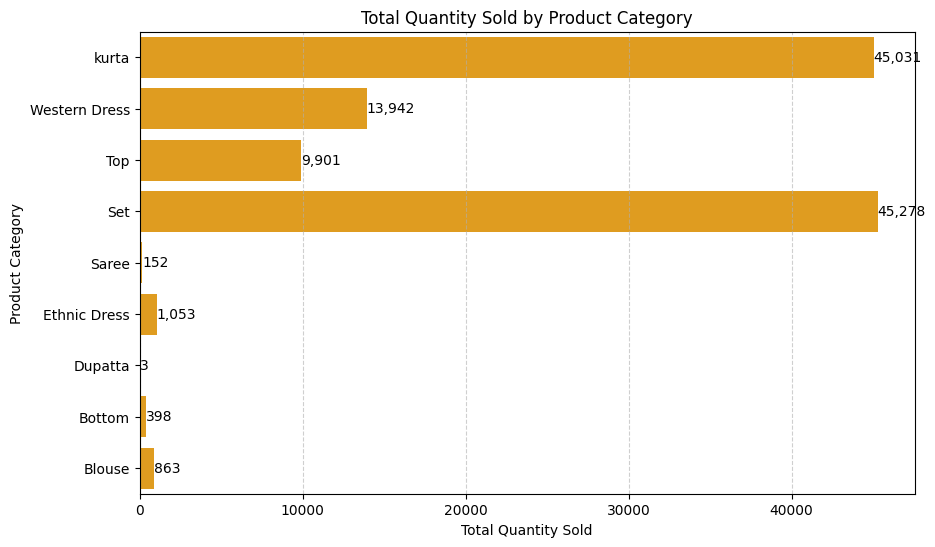

In [249]:
# Sorting the 'product' DataFrame by 'category' in descending order
product = product.sort_values(by='category', ascending=False)

# Seting the figure size for the bar plot
plt.figure(figsize=(10, 6))

# Creating a horizontal bar plot using Seaborn to visualize the total quantity sold by product category
sns.barplot(x='quantity', y='category', data=product, color='orange', ax=plt.gca(),
            ci=None, orient='h', order=product['category'])

# Displaying the quantity values on the plot
for index, value in enumerate(product['quantity']):
    plt.text(value, index, f'{int(value):,}', ha='left', va='center', color='black')

# Customizing the plot with labels, title, and grid
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Category')
plt.title('Total Quantity Sold by Product Category')
plt.grid(axis='x', linestyle='--', alpha=0.6)


We found that the high demand products are kurta, Western Dress, Top and set

In [250]:
#Sorting the 'product' DataFrame by 'category' and extracting the top 4 product categories
product = product.sort_values(by='category', ascending=False)
demand_sales = product.head(4)
demand_sales

,category,quantity
8,kurta,45031
7,Western Dress,13942
6,Top,9901
5,Set,45278


In [251]:
# Defining a list of high-demand products
high_demand_products= ["kurta","Western Dress","Top","Set"]

In [252]:
# Filtering out cancelled orders from the 'sales' DataFrame
demand_filtered = sales[sales['status'] != 'Cancelled']

In [253]:
# Grouping the filtered DataFrame by 'category' for high-demand products
grouped_sales = demand_filtered[demand_filtered['category'].isin(high_demand_products)].groupby('category')

In [254]:
# Calculating the total sales amount for each high-demand product category
product_sales = grouped_sales['amount'].sum()
product_sales

category
Set              35722725
Top               4903086
Western Dress    10208855
kurta            19419892
Name: amount, dtype: int64

In [255]:
# Assuming 'product_sales' contains the sales amounts for the high-demand products
fig = px.bar(product_sales.reset_index(), x='category', y='amount',
             labels={'category': 'Product Category', 'amount': 'Total Sales Amount'},
             title='Total Sales Amount for High-Demand Products',
             template='plotly', color_discrete_sequence=['orange'])

# Customize the layout
fig.update_layout(
    xaxis_title='Product Category',
    yaxis_title='Total Sales Amount',
    title_x=0.5,
    font=dict(size=14),
)

# Show the bar chart
fig.show()
